In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### **1**

1. Defina dos listas de valores `x` e `y`, tal que los pares (x,y) cumplan una relación lineal del tipo $y = 2x + 1$. Defina la lista de valores de `x` con 100 puntos en el intervalo de valores que van desde -1 hasta 1.

In [ ]:
x = np.linspace(-1,1,100)
y = 2*x + 1
x

2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

[Text(0.5, 1.0, 'Relación Lineal')]

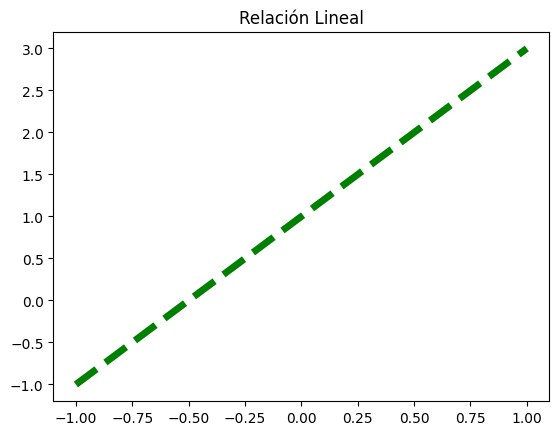

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y, color = 'green', linewidth = 5, linestyle = '--')

ax.set(title='Relación Lineal')

### **2**

Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

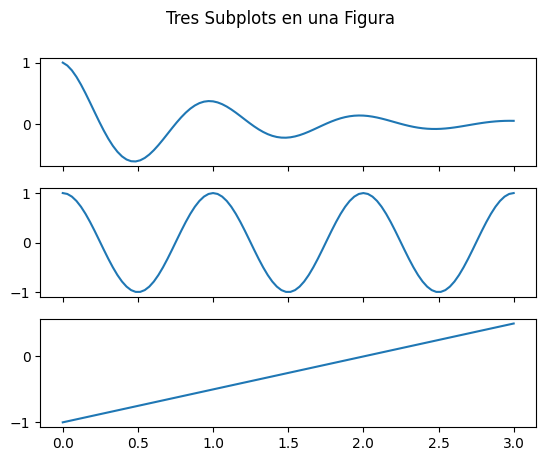

In [6]:
# Primero definimos tres curvas (x1,y1), (x2,y2) y (x3,y3)
x1 = np.linspace(0.0, 3.0 , 100)
x2 = np.linspace(0.0, 3.0, 100)
x3 = np.linspace(0.0, 3.0, 100)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
y3 = 0.5 * x3 - 1

fig, axes = plt.subplots(3,1,sharex=True)
fig.suptitle('Tres Subplots en una Figura')
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
axes[2].plot(x3, y3)


### **3**
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

In [ ]:
import pandas as pd
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']
# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)

In [ ]:
ARG_wine_reviews = wine_reviews[wine_reviews['country']=='Argentina']
ARG_wine_reviews.head()

,country,points,price,variety
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
183,Argentina,88,12.0,Torrontés
224,Argentina,90,22.0,Malbec
231,Argentina,85,10.0,Bonarda


In [ ]:
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

[Text(0.5, 0, 'Precio (usd)'),
 Text(0, 0.5, 'Puntaje'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos')]

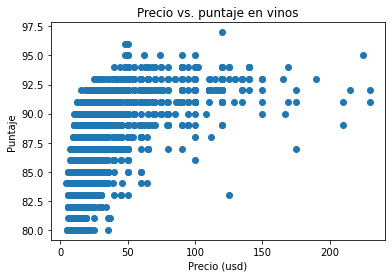

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(precio_arg, puntos_arg)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos')

### **4**

1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

In [7]:
mu = 20
sigma = 4
valores = mu + sigma * np.random.randn(10000)

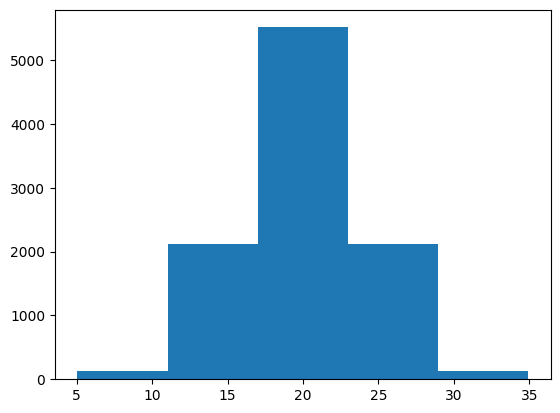

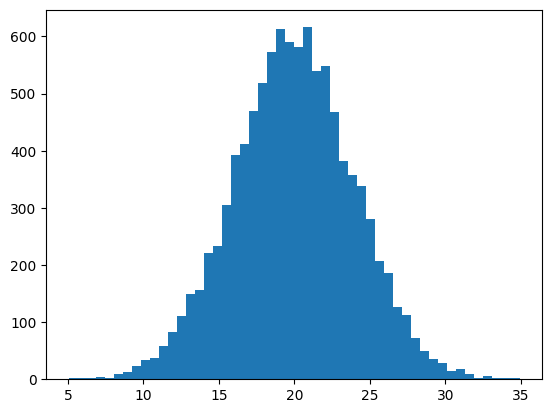

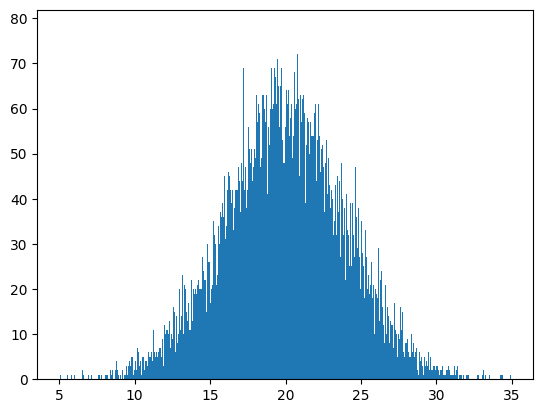

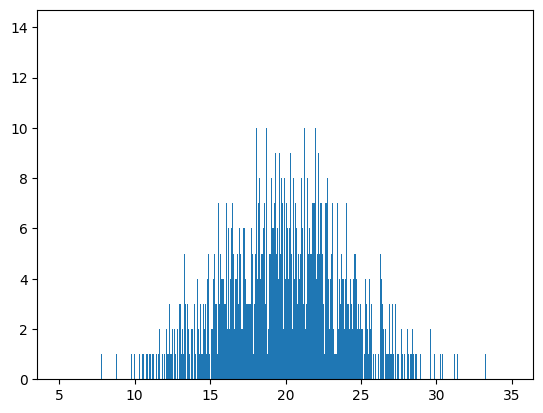

In [ ]:
# Aca decidimos la cantidad de bines que queremos tomar
for i_bin in [5,50,500,5000]:
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Ploteamos el histograma
    n, bins, _ = ax.hist(valores, bins = i_bin)

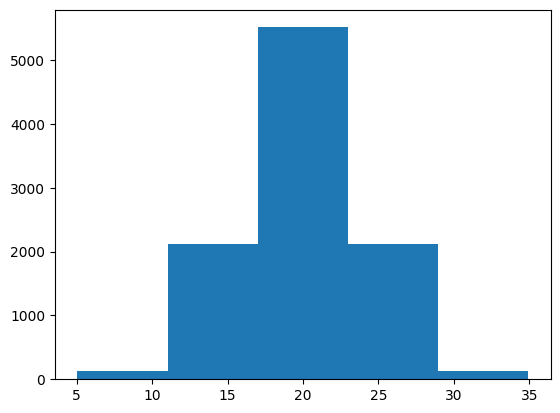

In [ ]:
fig, ax = plt.subplots()
# Ploteamos el histograma
n, bins, _ = ax.hist(valores, bins = 5)

In [ ]:
n

array([ 129., 2120., 5515., 2113.,  123.])

In [ ]:
bins

array([ 5.05166748, 11.02638244, 17.0010974 , 22.97581237, 28.95052733,
       34.92524229])

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [ ]:
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_85 = ARG_wine_reviews[ARG_wine_reviews['points']==85]
# Seleccionamos los vinos con puntaje igual a 90
ARG_wine_90 = ARG_wine_reviews[ARG_wine_reviews['points']==90]

# Armamos los vectores con los precios de cada vino
precios_arg_85 = ARG_wine_85.price.values
precios_arg_90 = ARG_wine_90.price.values

print('Cantidad de vinos de 85:',len(precios_arg_85))
print('Cantidad de vinos de 90:',len(precios_arg_90))

Cantidad de vinos de 85: 422
Cantidad de vinos de 90: 251


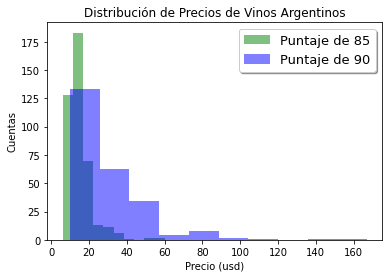

In [ ]:
# Definimos la cantidad de bins para cada grupo
n_bins_85 = 10
n_bins_90 = 10

# Creamos la figura y los ejes
fig, ax = plt.subplots()

n, bins, _ = ax.hist(precios_arg_85, n_bins_85, facecolor='g', alpha=0.5, label='Puntaje de 85')
n, bins, _ = ax.hist(precios_arg_90, n_bins_90, facecolor='b', alpha=0.5, label='Puntaje de 90')

ax.set(xlabel='Precio (usd)', ylabel='Cuentas',
       title='Distribución de Precios de Vinos Argentinos') #, xlim = (0,75))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='upper right', shadow=True, fontsize=13)

In [ ]:
n

array([133.,  63.,  34.,   4.,   8.,   2.,   1.,   0.,   1.,   1.])

In [ ]:
bins

array([ 10. ,  25.7,  41.4,  57.1,  72.8,  88.5, 104.2, 119.9, 135.6,
       151.3, 167. ])